In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog-image/dog (1).jpg
/kaggle/input/cat-and-dog-image/cat (1).jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.375.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.704.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.8597.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5740.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5703.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7717.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2618.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.1956.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5608.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5646.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7267.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5341.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2888.jpg
/kaggle/input/dogs-vs-cats/dogs_

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.preprocessing import image
import numpy as np

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="/kaggle/input/dogs-vs-cats/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="/kaggle/input/dogs-vs-cats/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
for images, labels in train_ds.take(1):
    print(f"Image Batch Shape: {images.shape}")
    print(f"Label Batch Shape: {labels.shape}")


Image Batch Shape: (32, 256, 256, 3)
Label Batch Shape: (32,)


In [5]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

# Apply data augmentation
def Augment(image, label):
    image = data_augmentation(image)
    return image, label

train_ds = train_ds.map(Augment)

In [6]:
#Normalize
def Normalize(image, label):
    image = tf.cast(image/ 255., dtype=tf.float32)
    return image, label

train_ds= train_ds.map(Normalize)
val_ds = val_ds.map(Normalize)

# creating CNN Model

In [7]:
Model = Sequential()

Model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size= (2, 2), strides = 2, padding= "valid"))

Model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size= (2, 2), strides = 2, padding= "valid"))

Model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size= (2, 2), strides = 2, padding= "valid"))

Model.add(Conv2D(256, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size= (2, 2), strides = 2, padding= "valid"))


Model.add(Flatten())

Model.add(Dense(256, activation = 'relu'))
Model.add(Dropout(.2))
Model.add(Dense(64, activation = 'relu'))
Model.add(Dropout(.2))
Model.add(Dense(32, activation = 'relu'))
Model.add(Dropout(.2))
Model.add(Dense(1, activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
Model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,254,209 (50.56 MB)

 Trainable params: 13,253,249 (50.56 MB)

 Non-trainable params: 960 (3.75 KB)

In [9]:

Model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [10]:

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3, 
    restore_best_weights=True
)

History = Model.fit(train_ds, epochs= 10, validation_data = val_ds, callbacks=[early_stopping])

Epoch 1/10


I0000 00:00:1736899652.915329      74 service.cc:145] XLA service 0x78dd700021b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736899652.915409      74 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  3/625 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - accuracy: 0.3715 - loss: 2.3677   

I0000 00:00:1736899662.539373      74 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_10', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1736899662.550641      74 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 451ms/step - accuracy: 0.5454 - loss: 1.4246 - val_accuracy: 0.6234 - val_loss: 0.6519
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 267s 427ms/step - accuracy: 0.6384 - loss: 0.6434 - val_accuracy: 0.6848 - val_loss: 0.5898
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 269s 431ms/step - accuracy: 0.6938 - loss: 0.5806 - val_accuracy: 0.6372 - val_loss: 0.7375
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 268s 429ms/step - accuracy: 0.7302 - loss: 0.5391 - val_accuracy: 0.6792 - val_loss: 0.6986
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 269s 430ms/step - accuracy: 0.7839 - loss: 0.4717 - val_accuracy: 0.7842 - val_loss: 0.4598
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 266s 425ms/step - accuracy: 0.8180 - loss: 0.4111 - val_accuracy: 0.7940 - val_loss: 0.4628
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 264s 422ms/step - accuracy: 0.8502 - loss: 0.3592 - val_accuracy: 0.8484 - val_loss: 0.3621
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 265s 423ms/step - accuracy: 0.8768 - loss: 0.29

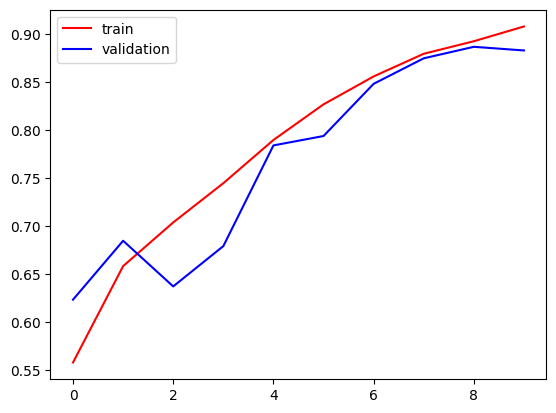

In [11]:
import matplotlib.pyplot as plt

plt.plot(History.history['accuracy'], color = 'red', label = 'train')
plt.plot(History.history['val_accuracy'], color = 'blue', label= 'validation')
plt.legend()
plt.show()

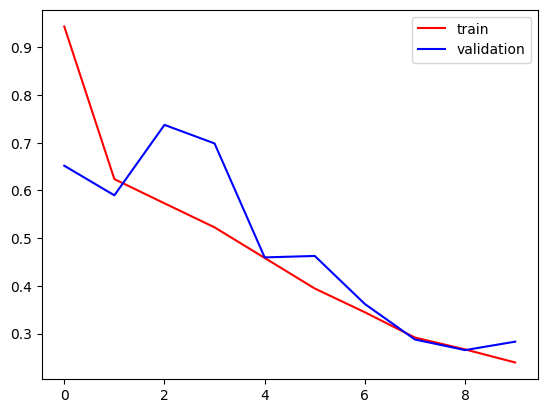

In [12]:
plt.plot(History.history['loss'], color = 'red', label = 'train')
plt.plot(History.history['val_loss'], color = 'blue', label= 'validation')
plt.legend()
plt.show()

In [13]:
img_path = "/kaggle/input/cat-and-dog-image/cat (1).jpg"

img = image.load_img(img_path, target_size = (256, 256))
image_arr = image.img_to_array(img)
img_arr = np.expand_dims(image_arr, axis=0)

img_arr = img_arr / 255.0

In [14]:
prediction = Model.predict(img_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


In [15]:
predicted_class = (prediction > 0.5).astype("int32")
predicted_class

array([[0]], dtype=int32)

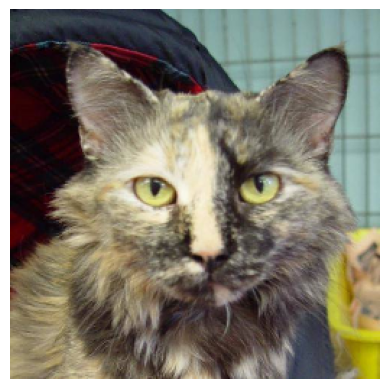

Prediction: Cat


In [16]:

plt.imshow(img)
plt.axis('off')  
plt.show()


if predicted_class == 0:
    print("Prediction: Cat")
else:
    print("Prediction: Dog")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


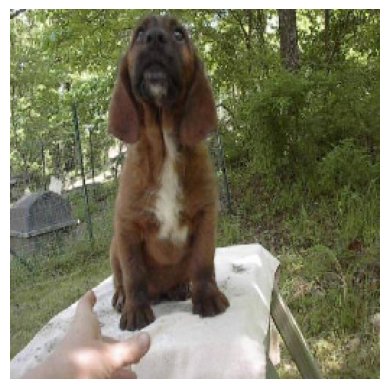

Prediction: Dog


In [17]:
img_path = "/kaggle/input/cat-and-dog-image/dog (1).jpg"

img = image.load_img(img_path, target_size = (256, 256))
image_arr = image.img_to_array(img)
img_arr = np.expand_dims(image_arr, axis=0)

img_arr = img_arr / 255.0

prediction = Model.predict(img_arr)
predicted_class = (prediction > 0.5).astype("int32")
predicted_class



plt.imshow(img)
plt.axis('off')  
plt.show()


if predicted_class == 0:
    print("Prediction: Cat")
else:
    print("Prediction: Dog")
